In [119]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


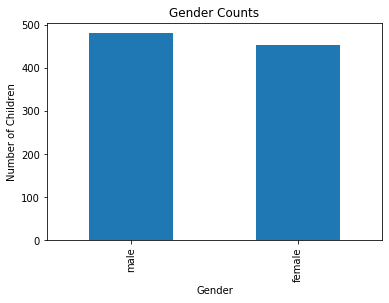

In [94]:
family = df[['family', 'children']].drop

genderCounts = df['gender'].value_counts()

genderCounts

# Plot a bar chart
%matplotlib inline
from matplotlib import pyplot as plt

genderCounts.plot(kind='bar', title='Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Number of Children')
plt.show()

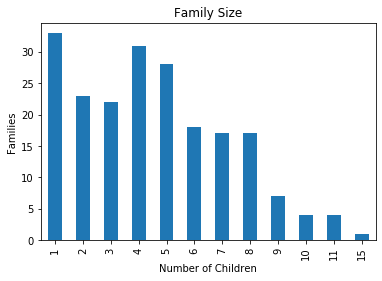

In [95]:
families = df[['family', 'children']].drop_duplicates()

child_count = families['children'].value_counts().sort_index()

child_count.plot(kind='bar', title='Family Size')
plt.xlabel('Number of Children')
plt.ylabel('Families')
plt.show()

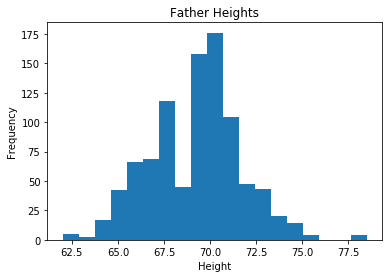

In [96]:
df['father'].plot.hist(title='Father Heights', bins = 19)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [97]:
df['father']

0      78.5
1      78.5
2      78.5
3      78.5
4      75.5
       ... 
929    62.0
930    62.0
931    62.0
932    62.5
933    62.5
Name: father, Length: 934, dtype: float64

In [98]:
child_parent_heights = df[['childHeight', 'midparentHeight']]

In [99]:
child_parent_heights

,childHeight,midparentHeight
0,73.2,75.43
1,69.2,75.43
2,69.0,75.43
3,69.0,75.43
4,73.5,73.66
...,...,...
929,64.0,66.64
930,62.0,66.64
931,61.0,66.64
932,66.5,65.27


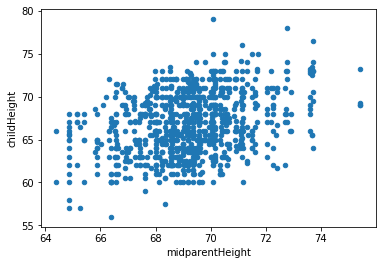

In [100]:
child_parent_heights.plot(kind='scatter', x = 'midparentHeight', y = 'childHeight')

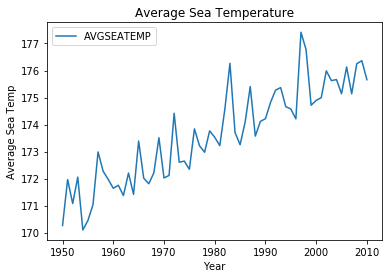

In [101]:
df = sm.datasets.elnino.load_pandas().data

df['AVGSEATEMP'] = df.mean(1)

# Plot a line chart
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(title='Average Sea Temperature', x='YEAR', y='AVGSEATEMP')
plt.xlabel('Year')
plt.ylabel('Average Sea Temp')
plt.show()

In [102]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,59000,40000,59000]})

print (df['Salary'].mode())

0    50000
1    59000
dtype: int64


In [103]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print (f"Min: {df['Salary'].min()}")
print (f"Mean: {df['Salary'].mean()}")
print (f"Median: {df['Salary'].median()}")
print (f"Mode: {df['Salary'].mode()}")
print (f"Max: {df['Salary'].max()}")

Min: 40000
Mean: 71000.0
Median: 54000.0
Mode: 0    50000
dtype: int64
Max: 189000


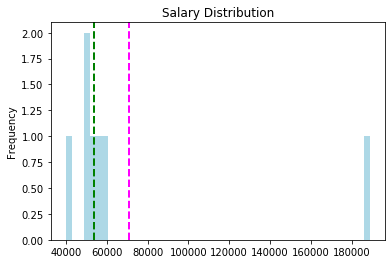

In [104]:
salary = df['Salary']
salary.plot.hist(title='Salary Distribution', color='lightblue', bins=50)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

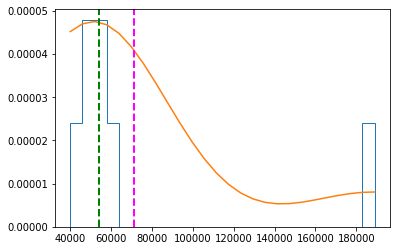

In [110]:
density = stats.gaussian_kde(salary)
n, x, _ = plt.hist(salary, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

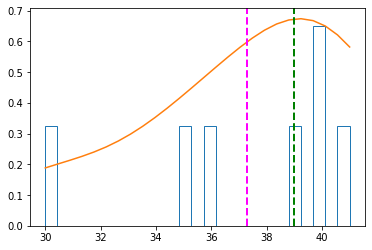

In [114]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

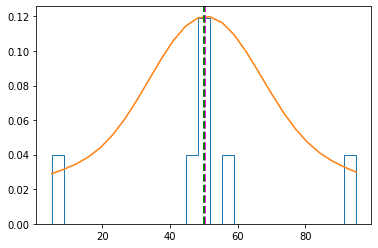

In [116]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Grade':[50,50,46,95,50,5,57]})

grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*7.5)
plt.axvline(grade.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(grade.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Salary skewness: 2.57316410755049
Salary kurtosis: 6.719828837773431


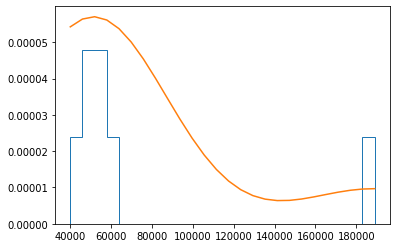



Hours skewness: -1.194570307262883
Hours kurtosis: 0.9412265624999989


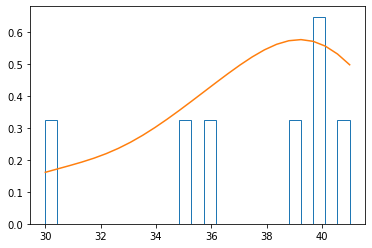



Grade skewness: -0.06512433009682762
Grade kurtosis: 2.7484764913773034


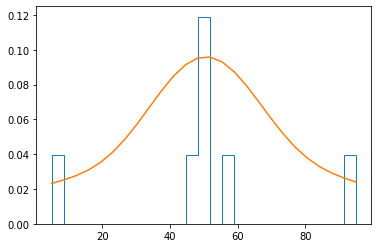

In [118]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

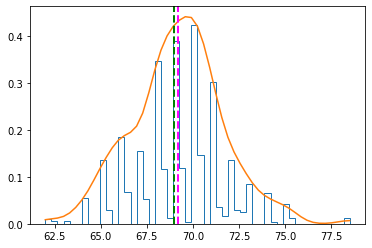

In [123]:
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data


fathers = df['father']
density = stats.gaussian_kde(fathers)
n, x, _ = plt.hist(fathers, histtype='step', density=True, bins=50)  
plt.plot(x, density(x)*2.5)
plt.axvline(fathers.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(fathers.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()